In [ ]:
#Sobre este conjunto de dados: Netflix é uma das plataformas de streaming de mídia e vídeo mais populares. 
#Eles têm mais de 8.000 filmes ou programas de TV disponíveis em sua plataforma. Em meados de 2021, 
#eles têm mais de 200 milhões de assinantes em todo o mundo. 
#Este conjunto de dados tabulares consiste em listas de todos os filmes e programas de TV disponíveis no Netflix, 
#juntamente com detalhes como elenco, diretores, classificações, ano de lançamento, duração, etc.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('netflix_titulos.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Visão Geral dos Dados

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data.isnull().sum()/len(data)*100

#Faltavam 29% na coluna diretor e 9% cada na coluna elenco e país.


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
 # Limpeza de dados¶
 # Como algumas colunas têm valores aninhados, vamos desaninha-las e preparar o conjunto de dados final.



In [10]:
#Unnesting listed_in column:
listed_constraint = data['listed_in'].apply(lambda x: str(x).split(", ")).tolist()
data1 = pd.DataFrame(listed_constraint, index = data['title'])
data1 = data1.stack()
data1 = pd.DataFrame(data1.reset_index())
data1.rename(columns={0:'Genre'}, inplace=True)
data1 = data1.drop(['level_1'], axis=1)
data1.head(20)


,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [11]:
# País

In [12]:


#Unnesting "country" column:
country_constraint = data['country'].apply(lambda x: str(x).split(", ")).tolist()
data2 = pd.DataFrame(country_constraint, index = data['title'])
data2 = data2.stack()
data2 = pd.DataFrame(data2.reset_index())
data2.rename(columns={0:'Country'}, inplace=True)
data2 = data2.drop(['level_1'], axis=1)
data2.head(20)



,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [13]:
# Diretor

In [14]:
 
dir_constraint = data['director'].apply(lambda x: str(x).split(", ")).tolist()
data3 = pd.DataFrame(dir_constraint, index = data['title'])
data3 = data3.stack()
data3 = pd.DataFrame(data3.reset_index())
data3.rename(columns={0:'Director'}, inplace=True)
data3 = data3.drop(['level_1'], axis=1)
data3.head(20)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [15]:
# Atores

In [16]:

df5 = df2.merge(df1,on=['title'],how='inner')
df6 = df5.merge(df3,on=['title'],how='inner')
df7 = df6.merge(df4,on=['title'],how='inner')
df7.head()



NameError: name 'df2' is not defined

In [ ]:
cast_constraint = data['cast'].apply(lambda x: str(x).split(", ")).tolist()
data4 = pd.DataFrame(cast_constraint, index = data['title'])
data4 = data4.stack()
data4 = pd.DataFrame(data4.reset_index())
data4.rename(columns={0:'Actor'}, inplace=True)
data4 = data4.drop(['level_1'], axis=1)
data4.head(20)

In [ ]:
# todos os dataframes não aninhados

In [ ]:
data5 = data2.merge(data1,on=['title'],how='inner')
data6 = data5.merge(data3,on=['title'],how='inner')
data7 = data6.merge(data4,on=['title'],how='inner')
data7.head()

In [ ]:
#Merge dados não aninhados com todo o dataframe



In [ ]:
data_merge = data7.merge(data[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
data_merge.head()


In [17]:
# 1. Análise de Sazonalidade de Gênero



In [18]:
# Converter 'date_added' em datetime
data_merge['date_added'] = pd.to_datetime(data_merge['date_added'])

# Extraia mês de 'date_added'
data_merge['month_added'] = data_merge['date_added'].dt.month

# Conte o número de cada gênero por mês
genre_counts = data_merge.groupby(['month_added', 'Genre']).size().unstack()

# Plotar os resultados

genre_counts.plot(kind='line', subplots=True, layout=(-1, 3), figsize=(15, 30), sharex=False, title='Monthly Genre Counts')
plt.tight_layout()
plt.show()


NameError: name 'data_merge' is not defined

In [19]:
#A partir do gráfico de linhas, podemos identificar vários gêneros com diferenças de sazonalidade distintas. 
#Isso pode revelar se a Netflix adiciona mais conteúdo em determinados meses, o que pode demonstrar variações sazonais
#nos hábitos dos espectadores.
# 1 - Gêneros populares na primavera: Science & Nature TV, Programas de TV britânicos, Comédias, Animie Series, Docuseries...
# 2 -Gêneros populares no verão: Ação & Aventura, Filmes românticos, Mistérios de TV, Filmes internacionais, Dramas de TV, 
#Filmes de terror, Filmes LGBTQ, Reality TV, Programas de TV
# 3 -Gêneros populares no outono: Documentários, Crianças e filmes de família, Filmes cult, Fé e espiritualidade, Thrillers,
#Thrillers de TV...
# 4 - Gêneros populares no inverno: Filmes de terror, Filmes independentes, Stand-up Comedy, Programas de TV coreanos, 
#Programas de TV romáticos..

 


In [20]:
# 2. Análise da vida útil do conteúdo


<Axes: xlabel='release_year'>

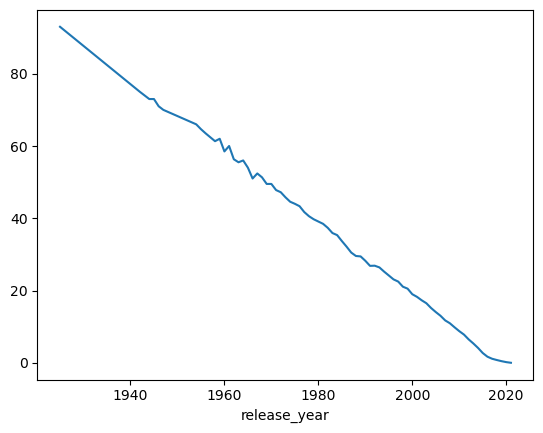

In [21]:
# Converter 'date_added' em datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extrair ano e mês do 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Calcular conteudo de vida utíl
data['content_lifespan'] = data['year_added'] - data['release_year']
data.groupby('release_year')['content_lifespan'].mean().plot(kind='line')



In [22]:
# A linha claramente decrescente indica que, em média, o tempo entre o lançamento do conteúdo e quando ele foi 
#adicionado ao Netflxi tem sido cada vez menor ao longo dos anos. Pode haver várias razões para isso:
# 1 - Mudanças estratégicas: a Netflix pode ter trabalhado estrategicamente para diminuir o 
#período de tempo para obter conteúdo mais recente para sua plataforma mais rapidamente, 
#por exemplo, colaboração com estúdios de produção. Isso pode ser para se manter competitivo e acompanhar 
#as expectativas dos usuários em relação a novos conteúdos.
# 2 - Crescimento do conteúdo original: A Netflix tem produzido cada vez mais seu próprio conteúdo - "Netflix Originals". 
#Theese naturalmente teria uma vida útil de 0, pois eles seriam adicionados à Netflix imediatamente após o lançamento, 
#contribuindo assim para uma vida média decrescente.

In [23]:
# 3 - Análise de Frequência de Palavras

#Aqui criamos duas nuvens de palavras com base nas descrições do conteúdo: uma para o conteúdo lançado antes de 2000 e 
#outra lançada depois de 2000. Escolhemos release_year porque ela representa melhor a preferência de consumo de conteúdo 
#público em um momento específico.


In [24]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Remover palavras paradas
stopwords = set(stopwords.words('english'))
data['description'] = data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Agregar descrições de 2000 até o presente e gerar nuvem de palavras
text = ' '.join(data[data['release_year'] >= 2000]['description'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("Word Cloud for 2000-Present")
plt.show()

# Agregar descrições anteriores a 2000 e gerar nuvem de palavras
text = ' '.join(df[df['release_year'] < 2000]['description'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("Word Cloud for Before 2000")
plt.show()



LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ADMLOCAL/nltk_data'
    - 'C:\\Users\\ADMLOCAL\\anaconda3\\nltk_data'
    - 'C:\\Users\\ADMLOCAL\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ADMLOCAL\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ADMLOCAL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
# Insights:

# 1 -Palavras comuns: A proeminência das palavras "vida" e "jovem" em ambos os períodos de tempo significa um tema recorrente no
#conteúdo da Netflix. Essas palavras indicam que muitas séries ou filmes se aprofundam em experiências de vida, jornadas 
#pessoais e os desafios ou aventuras de personagens mais jovens. A frequência dessas palavras também pode implicar que a 
#plataforma atende a um público mais jovem, com uma quantidade significativa de conteúdo adaptado às suas experiências e 
#interesses.
# 2 - Palavras únicas: Exclusivas da era 2000, as palavras "encontrar" e "novo" lançam luz sobre as mudanças nas tendências 
#de conteúdo. A palavra "encontrar" potencialmente aponta para narrativas centradas em temas de descoberta, exploração ou 
#buscas pessoais. "Novo", por outro lado, pode destacar conteúdos focados em novas experiências ou transições. 
#Além disso, dado o extenso lançamento de conteúdo original da Netflix neste período, "novo" também pode refletir a 
#singularidade e o frescor dessas ofertas



In [ ]:
# Converter 'date_added' para datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extrair ano e mês para 'date_added'
data['month_added'] = data['date_added'].dt.month.astype('category')

for month in data['month_added'].unique():
    text = ' '.join(data[data['month_added'] == month]['description'])
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(f"Word Cloud for Month {month}")
    plt.show()

